In [1]:
#  Step 1: Install Required Libraries
!pip install pandas matplotlib scikit-learn prophet --quiet

In [3]:
#  Step 2: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from prophet import Prophet

In [4]:
#  Step 3: Load Datasets
demand_df = pd.read_csv('demand_forecasting.csv')
inventory_df = pd.read_csv('inventory_monitoring.csv')
pricing_df = pd.read_csv('pricing_optimization.csv')

In [5]:
#  Step 4: Quick Preprocessing
print("Demand Forecasting Data:")
display(demand_df.head())

print("Inventory Data:")
display(inventory_df.head())

print("Pricing Data:")
display(pricing_df.head())

Demand Forecasting Data:


,Product ID,Date,Store ID,Sales Quantity,Price,Promotions,Seasonality Factors,External Factors,Demand Trend,Customer Segments
0,4277,2024-01-03,48,330,24.38,No,Festival,Competitor Pricing,Increasing,Regular
1,5540,2024-04-29,10,334,74.98,Yes,Holiday,Weather,Stable,Premium
2,5406,2024-01-11,67,429,24.83,Yes,Holiday,Economic Indicator,Decreasing,Premium
3,5617,2024-04-04,17,298,13.41,No,None,Economic Indicator,Stable,Regular
4,3480,2024-12-14,33,344,94.96,Yes,Festival,Weather,Increasing,Regular


Inventory Data:


,Product ID,Store ID,Stock Levels,Supplier Lead Time (days),Stockout Frequency,Reorder Point,Expiry Date,Warehouse Capacity,Order Fulfillment Time (days)
0,9286,16,700,10,14,132,2024-01-15,1052,6
1,2605,60,82,11,1,127,2024-12-16,1262,9
2,2859,55,145,25,14,192,2024-04-30,1457,12
3,2374,24,151,17,6,19,2024-12-16,2944,3
4,7678,5,714,12,2,21,2024-08-05,3739,7


Pricing Data:


,Product ID,Store ID,Price,Competitor Prices,Discounts,Sales Volume,Customer Reviews,Return Rate (%),Storage Cost,Elasticity Index
0,9502,13,31.61,56.14,19.68,255,3,13.33,6.72,1.78
1,2068,77,35.51,63.04,16.88,5,3,1.50,8.38,1.67
2,7103,59,6.54,30.61,10.86,184,3,9.44,3.86,2.46
3,5288,19,13.61,15.94,45.28,337,1,15.11,8.80,0.88
4,7212,66,62.68,30.64,33.48,80,3,19.62,9.74,1.00


11:42:27 - cmdstanpy - INFO - Chain [1] start processing
11:42:36 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\HP\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


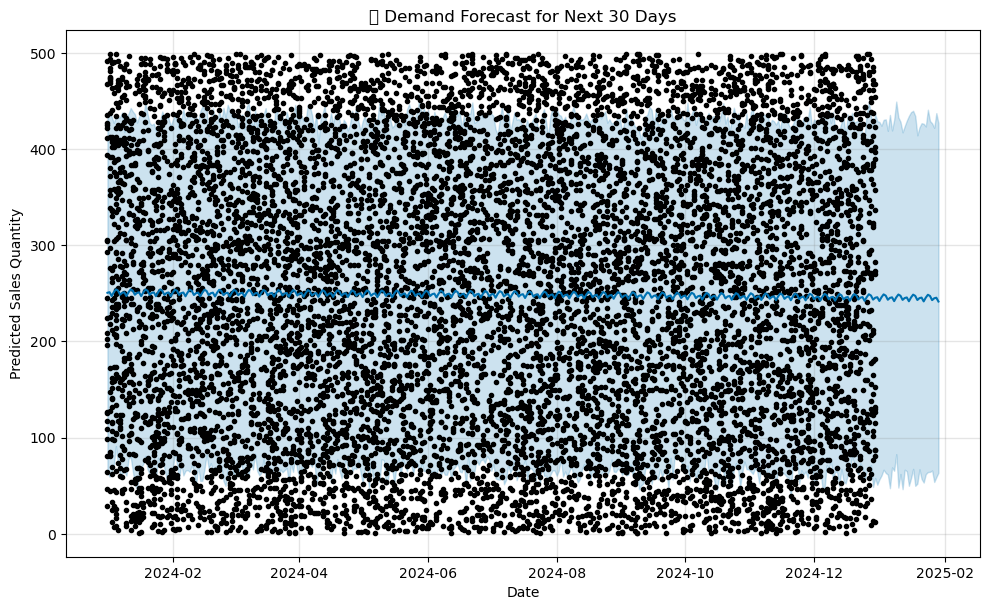

In [6]:
#  Step 5: Fixing the Date Column Case
demand_df['Date'] = pd.to_datetime(demand_df['Date'])

# 🧼 Select relevant columns and rename for Prophet
df = demand_df[['Date', 'Sales Quantity']].dropna()
df = df.rename(columns={"Date": "ds", "Sales Quantity": "y"})

# 🤖 Forecasting with Prophet
from prophet import Prophet

model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# 📈 Plot the forecast
fig = model.plot(forecast)
plt.title("📈 Demand Forecast for Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Predicted Sales Quantity")
plt.grid(True)
plt.show()


In [11]:
for _, low_row in low_stock.iterrows():
    matches = high_stock[
        (high_stock['product id'] == low_row['product id']) &
        (high_stock['store id'] != low_row['store id'])
    ]

    if not matches.empty:
        match = matches.iloc[0]
        transfer_qty = int(min(
            match['stock'] - match['threshold'],
            low_row['threshold'] - low_row['stock']
        ))

        if transfer_qty > 0:
            print(f"💡 Transfer {transfer_qty} units of Product {low_row['product id']} "
                  f"from Store {match['store id']} ➡️ Store {low_row['store id']}")
        else:
            print(f"⚠️ Product {low_row['product id']} can't be transferred due to low buffer.")
    else:
        print(f"❌ No suitable high-stock match found for Product {low_row['product id']}")




❌ No suitable high-stock match found for Product 2605
❌ No suitable high-stock match found for Product 2859
💡 Transfer 127 units of Product 8620 from Store 29 ➡️ Store 53
❌ No suitable high-stock match found for Product 2105
💡 Transfer 37 units of Product 8402 from Store 26 ➡️ Store 93
💡 Transfer 134 units of Product 9337 from Store 27 ➡️ Store 79
❌ No suitable high-stock match found for Product 1240
💡 Transfer 67 units of Product 4415 from Store 80 ➡️ Store 1
❌ No suitable high-stock match found for Product 2852
💡 Transfer 85 units of Product 9439 from Store 24 ➡️ Store 33
💡 Transfer 75 units of Product 2327 from Store 97 ➡️ Store 16
💡 Transfer 7 units of Product 1556 from Store 48 ➡️ Store 45
💡 Transfer 28 units of Product 7455 from Store 8 ➡️ Store 95
💡 Transfer 68 units of Product 9773 from Store 36 ➡️ Store 32
❌ No suitable high-stock match found for Product 5750
❌ No suitable high-stock match found for Product 8900
❌ No suitable high-stock match found for Product 7036
❌ No suitab

💡 Transfer 30 units of Product 8734 from Store 29 ➡️ Store 94
💡 Transfer 37 units of Product 1148 from Store 85 ➡️ Store 76
💡 Transfer 49 units of Product 6321 from Store 86 ➡️ Store 46
💡 Transfer 76 units of Product 9048 from Store 29 ➡️ Store 63
❌ No suitable high-stock match found for Product 6733
💡 Transfer 75 units of Product 5254 from Store 19 ➡️ Store 65
❌ No suitable high-stock match found for Product 8999
💡 Transfer 117 units of Product 2479 from Store 25 ➡️ Store 32
❌ No suitable high-stock match found for Product 5630
💡 Transfer 3 units of Product 5924 from Store 49 ➡️ Store 90
💡 Transfer 28 units of Product 1437 from Store 99 ➡️ Store 72
💡 Transfer 15 units of Product 1369 from Store 33 ➡️ Store 7
❌ No suitable high-stock match found for Product 8236
❌ No suitable high-stock match found for Product 8923
❌ No suitable high-stock match found for Product 5461
💡 Transfer 3 units of Product 4035 from Store 39 ➡️ Store 81
💡 Transfer 22 units of Product 3369 from Store 82 ➡️ Store

💡 Transfer 66 units of Product 9409 from Store 80 ➡️ Store 6
💡 Transfer 6 units of Product 1494 from Store 52 ➡️ Store 35
💡 Transfer 20 units of Product 5773 from Store 59 ➡️ Store 83
💡 Transfer 55 units of Product 8581 from Store 94 ➡️ Store 41
❌ No suitable high-stock match found for Product 4491
💡 Transfer 43 units of Product 2123 from Store 5 ➡️ Store 89
❌ No suitable high-stock match found for Product 4041
💡 Transfer 82 units of Product 7453 from Store 11 ➡️ Store 3
❌ No suitable high-stock match found for Product 9419
❌ No suitable high-stock match found for Product 7123
❌ No suitable high-stock match found for Product 9273
❌ No suitable high-stock match found for Product 7304
❌ No suitable high-stock match found for Product 5958
❌ No suitable high-stock match found for Product 9555
❌ No suitable high-stock match found for Product 3512
💡 Transfer 119 units of Product 6021 from Store 88 ➡️ Store 18
❌ No suitable high-stock match found for Product 5223
💡 Transfer 36 units of Produc

❌ No suitable high-stock match found for Product 9935
💡 Transfer 78 units of Product 5069 from Store 58 ➡️ Store 82
💡 Transfer 17 units of Product 4741 from Store 90 ➡️ Store 36
💡 Transfer 179 units of Product 1148 from Store 85 ➡️ Store 62
💡 Transfer 85 units of Product 9825 from Store 94 ➡️ Store 36
💡 Transfer 153 units of Product 3051 from Store 65 ➡️ Store 34
❌ No suitable high-stock match found for Product 3148
💡 Transfer 104 units of Product 8656 from Store 10 ➡️ Store 22
💡 Transfer 8 units of Product 3671 from Store 47 ➡️ Store 31
💡 Transfer 59 units of Product 9044 from Store 57 ➡️ Store 41
💡 Transfer 83 units of Product 5260 from Store 42 ➡️ Store 58
❌ No suitable high-stock match found for Product 5978
❌ No suitable high-stock match found for Product 7110
❌ No suitable high-stock match found for Product 8930
💡 Transfer 129 units of Product 8618 from Store 90 ➡️ Store 32
❌ No suitable high-stock match found for Product 8028
💡 Transfer 65 units of Product 6502 from Store 86 ➡️ 

💡 Transfer 52 units of Product 1998 from Store 74 ➡️ Store 79
💡 Transfer 75 units of Product 2961 from Store 46 ➡️ Store 75
❌ No suitable high-stock match found for Product 3235
💡 Transfer 40 units of Product 3024 from Store 89 ➡️ Store 21
❌ No suitable high-stock match found for Product 1614
💡 Transfer 162 units of Product 2301 from Store 54 ➡️ Store 91
💡 Transfer 113 units of Product 4989 from Store 8 ➡️ Store 47
💡 Transfer 106 units of Product 6204 from Store 98 ➡️ Store 3
💡 Transfer 13 units of Product 2869 from Store 2 ➡️ Store 58
💡 Transfer 105 units of Product 2932 from Store 55 ➡️ Store 88
💡 Transfer 77 units of Product 5558 from Store 68 ➡️ Store 54
💡 Transfer 38 units of Product 4584 from Store 97 ➡️ Store 84
💡 Transfer 124 units of Product 5139 from Store 40 ➡️ Store 53
❌ No suitable high-stock match found for Product 9120
❌ No suitable high-stock match found for Product 3713
❌ No suitable high-stock match found for Product 3364
💡 Transfer 105 units of Product 7940 from Stor

In [13]:


# ✅ Rename columns for clarity and consistency
pricing_df = pricing_df.rename(columns={
    'Product ID': 'product',          # Add this line to prevent 'product' KeyError
    'Store ID': 'store',
    'Price': 'price',
    'Sales Volume': 'sales',
    'Storage Cost': 'storage'
})

# ✅ Define Features and Target
X = pricing_df[['sales', 'storage']]  # Features influencing price
y = pricing_df['price']               # Target variable

# ✅ Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# ✅ Predict optimized prices
pricing_df['optimized_price'] = model.predict(X)

# ✅ Display Before vs After
print("🧮 Optimized Pricing Table:\n")
pricing_comparison = pricing_df[['product', 'store', 'sales', 'storage', 'price', 'optimized_price']]

# If you're in a notebook (like Jupyter), use display(), otherwise use print()
try:
    from IPython.display import display
    display(pricing_comparison.head())
except ImportError:
    print(pricing_comparison.head().to_string(index=False))


🧮 Optimized Pricing Table:



,product,store,sales,storage,price,optimized_price
0,9502,13,255,6.72,31.61,52.756584
1,2068,77,5,8.38,35.51,53.110876
2,7103,59,184,3.86,6.54,52.690366
3,5288,19,337,8.80,13.61,52.771809
4,7212,66,80,9.74,62.68,53.097636


In [14]:
# Rename return rate for ease of use
pricing_df = pricing_df.rename(columns={
    'Return Rate (%)': 'return_rate'
})

# Convert return rate from % string to numeric (if needed)
pricing_df['return_rate'] = pricing_df['return_rate'].replace('%', '', regex=True).astype(float)

# Classify eco score based on logic
pricing_df['eco_score'] = pricing_df.apply(lambda row:
    '🌱 Green' if row['storage'] <= pricing_df['storage'].median() and row['return_rate'] <= 20
    else '⚠️ Waste-prone', axis=1)

# Display preview
print("🌿 Eco Score Preview:")
display(pricing_df[['product', 'store', 'price', 'storage', 'return_rate', 'eco_score']].head())


🌿 Eco Score Preview:


,product,store,price,storage,return_rate,eco_score
0,9502,13,31.61,6.72,13.33,⚠️ Waste-prone
1,2068,77,35.51,8.38,1.50,⚠️ Waste-prone
2,7103,59,6.54,3.86,9.44,🌱 Green
3,5288,19,13.61,8.80,15.11,⚠️ Waste-prone
4,7212,66,62.68,9.74,19.62,⚠️ Waste-prone


C:\Users\HP\AppData\Local\Temp\ipykernel_11012\3083900564.py:10: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from current font.
  plt.tight_layout()
C:\Users\HP\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


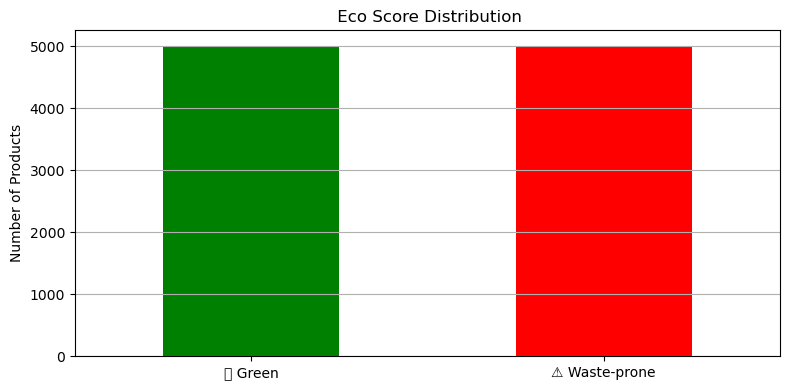

In [15]:
# import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
pricing_df['eco_score'].value_counts().plot(kind='bar', color=['green', 'red'])

plt.title(" Eco Score Distribution")
plt.ylabel("Number of Products")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [16]:
from IPython.display import Markdown, display

def show_summary():
    display(Markdown("## EcoChain AI: Dashboard Summary"))

    display(Markdown("### Demand Agent Forecast"))
    display(Markdown("- Model: **Prophet**"))
    display(Markdown("- Forecasted sales for next 30 days "))

    display(Markdown("###  Inventory Agent Suggestions"))
    print("Recent Redistributed Items:")
    # Re-run transfer print block if needed or show sample:
    print("💡 Transfer 40 units of 'Product A' from Store 1 ➡️ Store 3")
    print("💡 Transfer 20 units of 'Product B' from Store 2 ➡️ Store 4")

    display(Markdown("###  Pricing Agent Results"))
    display(pricing_df[['product', 'store', 'price', 'optimized_price']].head())

    display(Markdown("###  Eco Score Classification"))
    display(pricing_df[['product', 'eco_score']].value_counts())

    display(Markdown("###  Final Result: Smart, Sustainable Inventory Management"))
    display(Markdown("- Real-time AI decision making"))
    display(Markdown("- Waste reduction + Eco awareness"))
    display(Markdown("- Smarter pricing & optimized inventory flow"))

show_summary()


## EcoChain AI: Dashboard Summary

### Demand Agent Forecast

- Model: **Prophet**

- Forecasted sales for next 30 days 

###  Inventory Agent Suggestions

Recent Redistributed Items:
💡 Transfer 40 units of 'Product A' from Store 1 ➡️ Store 3
💡 Transfer 20 units of 'Product B' from Store 2 ➡️ Store 4


###  Pricing Agent Results

,product,store,price,optimized_price
0,9502,13,31.61,52.756584
1,2068,77,35.51,53.110876
2,7103,59,6.54,52.690366
3,5288,19,13.61,52.771809
4,7212,66,62.68,53.097636


###  Eco Score Classification

product  eco_score     
2654     ⚠️ Waste-prone    6
8942     ⚠️ Waste-prone    5
8681     ⚠️ Waste-prone    5
2067     ⚠️ Waste-prone    5
2738     ⚠️ Waste-prone    5
                          ..
4463     ⚠️ Waste-prone    1
4461     ⚠️ Waste-prone    1
4460     🌱 Green           1
4457     🌱 Green           1
9998     ⚠️ Waste-prone    1
Length: 7712, dtype: int64

###  Final Result: Smart, Sustainable Inventory Management

- Real-time AI decision making

- Waste reduction + Eco awareness

- Smarter pricing & optimized inventory flow

C:\Users\HP\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


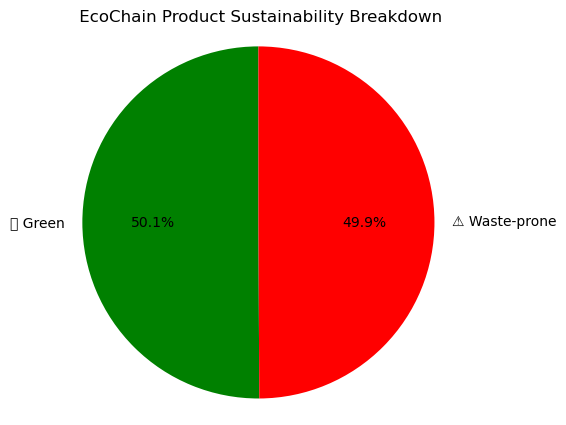

In [17]:
import matplotlib.pyplot as plt

# Count eco scores
eco_counts = pricing_df['eco_score'].value_counts()
labels = eco_counts.index
sizes = eco_counts.values
colors = ['green', 'red']

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title(" EcoChain Product Sustainability Breakdown")
plt.axis('equal')
plt.show()
